![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Classification of Eyes and Noses

A Toy example:

Two-class problem: grayscale images of 32x32 pixels of eyes and noses.

In [ ]:
!wget https://www.dropbox.com/s/vrrur8trlxi91p9/eyenose.zip
!unzip -qq eyenose.zip

--2023-09-26 15:48:40--  https://www.dropbox.com/s/vrrur8trlxi91p9/eyenose.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/vrrur8trlxi91p9/eyenose.zip [following]
--2023-09-26 15:48:40--  https://www.dropbox.com/s/raw/vrrur8trlxi91p9/eyenose.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2f03f1dd4fb8e3adfa3174b9fc.dl.dropboxusercontent.com/cd/0/inline/CEcVt2BTLdqwnWIlFgSJwWMRCleKz3Voyi2Z558lbGrm8dl-FjMk3MKmmQ81Rx10tM3mwjUD10B5ODniHvoQwJv0IxmABj8FNvQ740csdXG3ZNdpjVQAeUfqr9FjVAJNoiU/file# [following]
--2023-09-26 15:48:41--  https://uc2f03f1dd4fb8e3adfa3174b9fc.dl.dropboxusercontent.com/cd/0/inline/CEcVt2BTLdqwnWIlFgSJwWMRCleKz3Voyi2Z558lbGrm8dl-FjMk3MKmmQ81Rx10tM3mwjUD10B5ODniHvoQwJv0IxmABj8FNvQ740csdXG3ZNdpjVQAeUfqr9F

In [ ]:
import torch
import torchvision
from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

#train and test data directory
train_dir = "eyenose/train"
test_dir  = "eyenose/test"

#load the train and test data
train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((32,32)),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((32,32)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

Size image: torch.Size([3, 32, 32])
   Classes:  ['eye', 'nose']


In [ ]:
!wget https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
from cnn_utils import *
print('cnn_utils module has been loaded')

--2023-09-26 15:48:50--  https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2q224dslxdiag7i/cnn_utils.py [following]
--2023-09-26 15:48:50--  https://www.dropbox.com/s/raw/2q224dslxdiag7i/cnn_utils.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4c91561d77c5cbc59651d7f13c.dl.dropboxusercontent.com/cd/0/inline/CEcqny4IqPGGtd1OJUN5jKMF-nQQdv1bopIPLG-7u_A62iU3pLkN51Xa2krItmtrfsouOQItbKTRT3wIy6dCje86O1nDk7sK0ARiU208W--Y3uZGJsGP7p5GaZ42MObZ3WQ/file# [following]
--2023-09-26 15:48:51--  https://uc4c91561d77c5cbc59651d7f13c.dl.dropboxusercontent.com/cd/0/inline/CEcqny4IqPGGtd1OJUN5jKMF-nQQdv1bopIPLG-7u_A62iU3pLkN51Xa2krItmtrfsouOQItbKTRT3wIy6dCje86O1nDk7sK0ARiU208W--Y3uZGJsGP7p5G

Image: 1535, Label : eye


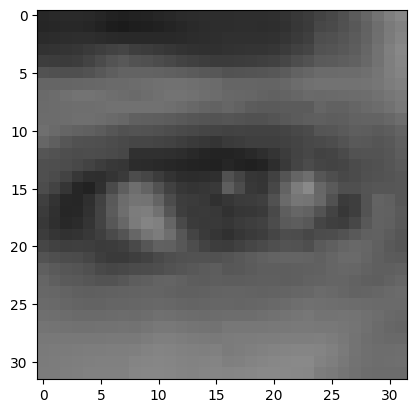

In [ ]:
#display an image in the training dataset
display_img(train_set,1535)

In [ ]:
batch_size = 40
val_size   = 960
train_size = len(train_set) - val_size

train_data,val_data = random_split(train_set,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl = DataLoader(val_data, 2*batch_size, num_workers = 4, pin_memory = True)

Length of Train Data : 7360
Length of Validation Data : 960


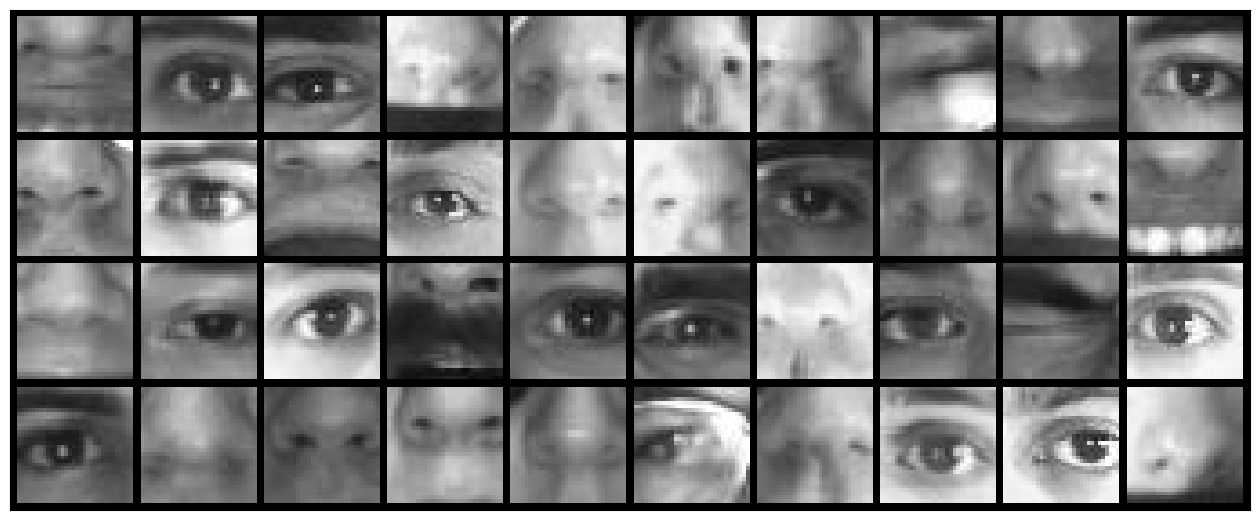

In [ ]:
show_batch(train_dl,nrow=10)

In [ ]:
# Classic architecture definition
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.conv2_1 = nn.Conv2d(3, 4, kernel_size = 5, stride = 1, padding = 0)
        self.relu_1  = nn.ReLU()
        self.conv2_2 = nn.Conv2d(4,8, kernel_size = 5, stride = 6, padding = 0)
        self.relu_2  = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2,2)
        self.flatten = nn.Flatten()
        self.fc      = nn.Linear(32,2)

    def forward(self, x):
        x  = self.conv2_1(x)
        x  = self.relu_1(x)
        x  = self.conv2_2(x)
        x  = self.relu_2(x)
        x  = self.maxpool(x)
        x  = self.flatten(x)
        x  = self.fc(x)
        return F.log_softmax(x, dim=1)

In [ ]:
# New architecture definition (equivalent to previous cell)
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            # BLOCK C
            nn.Conv2d(in_channels=3, out_channels=4, kernel_size = 5, stride = 1, padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels=4, out_channels=8, kernel_size = 5, stride = 6, padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            # BLOCK F
            nn.Flatten(),
            nn.Linear(32,2),
            nn.Dropout(0.25)
        )

    def forward(self, xb):
        return self.network(xb)


In [ ]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(4, 8, kernel_size=(5, 5), stride=(6, 6))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=32, out_features=2, bias=True)
    (7): Dropout(p=0.25, inplace=False)
  )
)


In [ ]:
#fitting the model on training data and record the result after each epoch
num_epochs = 50
opt_func   = torch.optim.Adam
lr         = 0.005
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      0.3692      0.1034      0.9667    ***       2.2 
    1      0.1420      0.1027      0.9615              1.9 
    2      0.1178      0.0627      0.9802    ***       2.0 
    3      0.1090      0.0499      0.9823    ***       1.8 
    4      0.1088      0.0548      0.9760              1.9 
    5      0.1046      0.0397      0.9844    ***       1.8 
    6      0.1002      0.0393      0.9896    ***       1.9 
    7      0.0958      0.0345      0.9875              1.9 
    8      0.1031      0.1105      0.9646              1.8 
    9      0.0966      0.0396      0.9854              2.0 
   10      0.0964      0.0572      0.9771              1.9 
   11      0.0940      0.0317      0.9865              1.8 
   12      0.0934      0.0550      0.9812              1.9 
   13      0.0863      0.0335      0.9875              1.9 
   14      0.0913      0.0485 

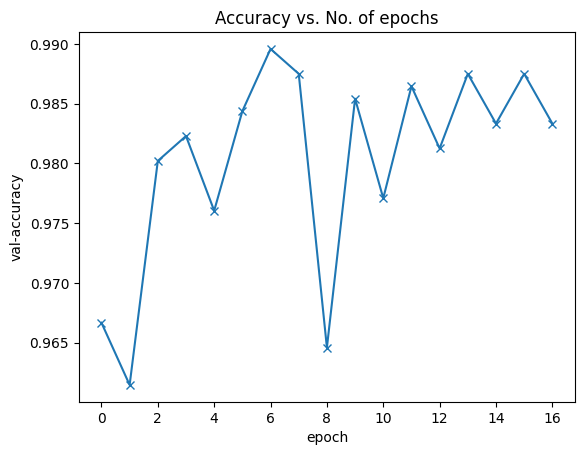

In [ ]:
plot_accuracies(history)

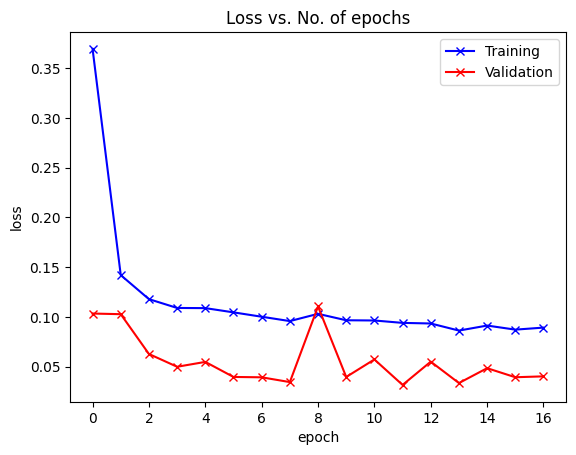

In [ ]:
plot_losses(history)

In [ ]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


In [ ]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred)
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.9788461538461538
 
Confusion Matrix = 
[[1003   37]
 [   7 1033]]


Confusion Matrix:
[[1003   37]
 [   7 1033]]
Accuracy = 97.88


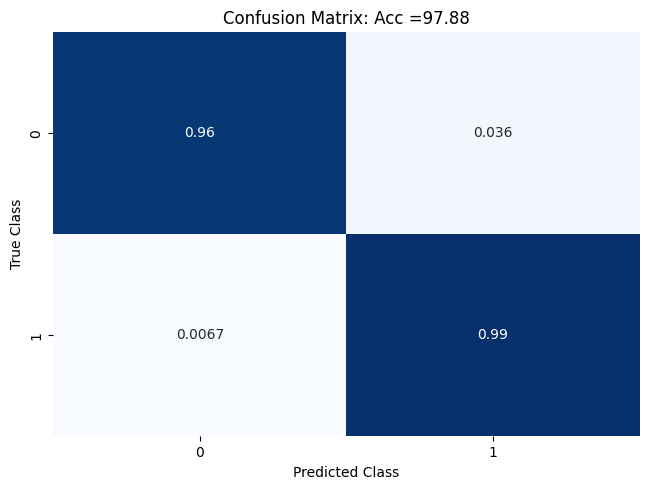

In [ ]:
print_confusion(ytest,ypred,show_heatmap=1,Cnorm=1040)

In [ ]:
C1,acc1 = performance(model,train_data,'Training')
C2,acc2 = performance(model,val_data,'Validation')
C3,acc3 = performance(model,test_set,'Testing')

Training Confusion Matrix = 
[[3601   72]
 [  45 3642]]
 
Training Accuracy = 0.9841
 
Validation Confusion Matrix = 
[[482   5]
 [  5 468]]
 
Validation Accuracy = 0.9896
 
Testing Confusion Matrix = 
[[1003   37]
 [   7 1033]]
 
Testing Accuracy = 0.9788
 
